<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN 회귀시 문제

- 특이값에 대응을 잘 못한다


In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(model.predict([[50]]))

[1033.33333333]


### 모델 산점도 찍기

[[6. 7. 7.]] [[34  8 14]]


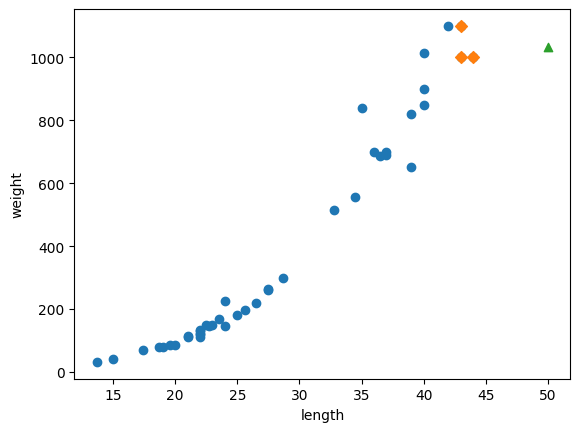

In [7]:
import matplotlib.pyplot as plt

distances, indexes = model.kneighbors([[50]])
print(distances, indexes)
plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes], train_target[indexes],marker = "D")

plt.scatter(50, 1033, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이 경우에는 length가 매우 큰 값 중 어떤 수가 들어오더라도(특이값이 들어올 때) knn경우 가장 가까운 데이터의 k개의 평균을 내기 때문에 모두 같은 값을 예측한다

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


# 이 경우 다른 회귀 모델을 찾아 써야 함!

**여기서는 선형회귀가 가장 적합해 보임!**

- 선형회귀는 y = Ax + b로 표현이 가능함
- coef_, intercept_ 에 A와 b가 저장되어 있음



In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [10]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


## 그래프로 표현

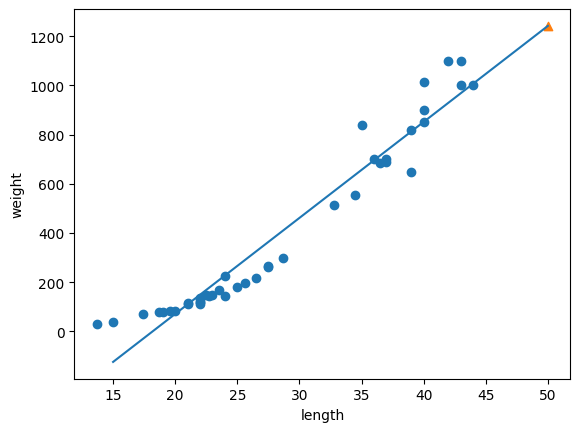

In [12]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###R^2 확인하기

- 결정계수

R^2 = 1- ((타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합)

In [21]:
test_mean = lr.predict(test_input).mean()

print(1- (sum(((test_target-lr.predict(test_input))**2)) / sum((test_target-test_mean)**2)))

print(lr.score(test_input, test_target))

0.8249944502439577
0.8247503123313558


### 조금 더 복잡하게 선형회귀 만들기

- 파라미터를 여러 개 사용

In [23]:
#차원 2개로 해서 2차 함수로 만들기
train_poly = np.column_stack((train_input ** 2, train_input))
print(train_poly)
test_poly = np.column_stack((test_input**2, test_input))



[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [32]:
#새로운 모델 만들기

lr1 = LinearRegression()
lr1.fit(train_poly, train_target)
print(lr1.coef_, lr1.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


### 그래프로 확인해보기

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49]
1.0143321093767301 -21.557924978837352


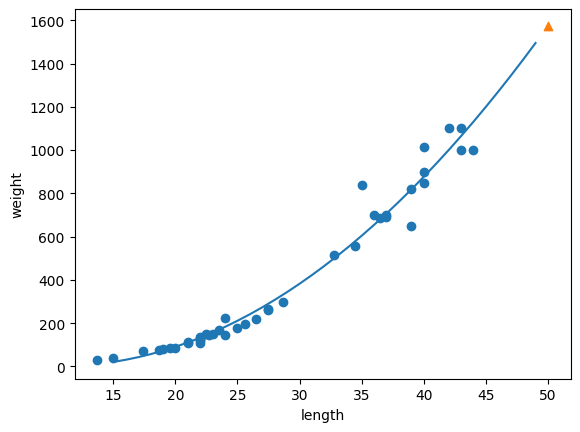

In [41]:
points = np.arange(15,50)
print(points)
print(lr1.coef_[0],lr1.coef_[1])
plt.plot(points, lr1.coef_[0]*points**2+lr1.coef_[1]*points + lr1.intercept_)
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(50,1574, marker ="^")
plt.show()


In [44]:
lr1.score(test_poly, test_target)

0.9775935108325122